# Chapter 64: Generalization Theory

### This code generates figures 5, 11 in Chapter 64: Generalization Theory (vol. III)


#### Runs simulations for Example 1 in the chapter


TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.


<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs.  The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Saba Nasiri. 

required libraries:
    
1. numpy
2. matplotlib.pyplot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Example 64.1 (Numerical example)

We illustrate the curse of dimensionality effect by means of an example. A collection of N = 2000 feature vectors $h_n \in \mathbb{R}^M$ are generated randomly for increasing values of M. The entries pf each $h_n$ are uniformly distributed within the range [-0.5, 0.5] so that the features vectors lie inside a hypercube of unit edge centered at the origin. For each fixed M, we determine the distance to the closest neighbor for each feature vector and average these distances over all N = 2000 vectors. The numerical values listed in Table 64.1 are obtained in this manner.

**Table 64.1** Average minimum distance to nearest nighbor for different M, obtained by averaging over N = 2000 random feature vectors.

$$
\begin{array}{c|c|c}
\textnormal{Dimension, } M & \textnormal{Average minimum distance} \\ 
1 & 0.00026 \\
10 & 0.46 \\
50 & 2.07 \\
100 & 3.28 \\
500 & 8.34 \\
1000 & 12.13 \\
5000 & 28.10 \\
10000 & 40.06
\end{array} \;\;
$$

The values in the table indicate that the minimum distance between uniformly distributed feature vectors increases quickly with the feature dimension, M, so that the feature vectors become more dispersed in higher dimensions. Actually, as the dimension M increases, the feature vectors tend to concentrate at the corners of the unit hypercube. To see this, assume we insert a sphere of radius 1/2 inside this hypercube; it is centered at the center of the cube - see Fig 64.3. Its volume is given by the expression

$$
\textnormal{volume} = (\frac{1}{2})^M\frac{\pi^{M/2}}{\Gamma(\frac{M}{2}+1)} \tag{64.3}
$$

in terms of the gamma function, $\Gamma(x)$, defined earlier in Prob. 4.3. Since the feature vectors are uniformly distributed in space, we find that the ratio of points that lie inside the sphere relative to the points that lie inside the hypercube is equal to the above volume expression. Taking the limit as $M \to\infty$, the volume expression approaches zero (see Pob. 64.8), which confirms that most of the volume of the hypercube is at its $2^M$ corners and not in the center. Consequently, the feature vectors become more spread out as M increases.

In [2]:
N = 2000 # number of feature vectors
M_vec = np.array([1, 10, 50, 100, 500, 1000, 5000, 10000]) # dimension sizes
ML = np.max(M_vec.shape)

dist = np.zeros((ML,))

for m in range(ML):
    M = M_vec[m] # dimension of feature space
    print(M)
    H = np.random.rand(N, M) - 0.5*np.ones((N, M)) # N feature row vectors uniformly distributed in [-0.5,0.5]
    d_min = M * np.ones((N,))
    for n in range(N):
        h = H[n, :]
        for nn in range(N): # find minimum distance for each feature vector
            h2 = H[nn, :]
            d = np.linalg.norm(h-h2) # Euclidean distance
            if nn != n and d < d_min[n]:
                d_min[n] = d
    
    dist[m] = np.mean(d_min[:]) # average of minimum distances over all feature vectors


1
10
50
100
500
1000
5000
10000


In [3]:
# data for Table 1 of the Chapter on Generalization Theory
print(np.concatenate([M_vec.reshape(-1, 1), dist.reshape(-1, 1)], axis = 1))

[[1.00000000e+00 2.58778133e-04]
 [1.00000000e+01 4.65556017e-01]
 [5.00000000e+01 2.07340094e+00]
 [1.00000000e+02 3.27571843e+00]
 [5.00000000e+02 8.33924198e+00]
 [1.00000000e+03 1.21330858e+01]
 [5.00000000e+03 2.80955774e+01]
 [1.00000000e+04 4.00559307e+01]]


## Vapnik-Chervonenkis bound

To arrive at this important conclusion, we let VC denote the so-called $\textit{Vapnik--Chervonenkis}$ dimension of the classifier set, ${\cal C}$ (we will not be limiting this set to linear classifiers in the current discussion). We will define the VC  dimension later in Section 64.4. Here, it is sufficient to know that this nonnegative number serves as a measure of the complexity of the classification set: More complex classifier models will have larger VC dimension than simpler models. For example, for the case of affine classifiers, we will find that $\textnormal{VC}=M+1$.

The argument that leads to future conclusion (64.20) relies on a fundamental result in statistical learning theory, known as the Vapnik--Chervonenkis  bound. The result is motivated in Probs. 64.24--64.25 under some simplifying conditions, and is proven more generally in Appendix 64.C. To state the result, we introduce an auxiliary parameter. Given any small $\epsilon>0$, we introduce a positive factor $\delta>0$ that depends on $N$, VC, and $\epsilon$ as follows:

$$
\delta(N,\textnormal{VC},\epsilon) \overset{\Delta}{=} \sqrt{\frac{32}{N}\left\{\textnormal{VC}\,\ln\left(\frac{Ne}{\textnormal{VC}}\right)+\ln\left(\frac{8}{\epsilon}\right)\right\}} \tag{64.13}
$$

where the letter "e" refers to the base number for natural logarithms, $e\approx 2.7183$. Observe that the value of $\delta$ is $\textit{independent}$ of the distribution of the data, $f_{\bm{\gamma},h}(\gamma,h)$, and that $\delta$ is small when $N$ is large (i.e., under sufficient training data) and VC is small (i.e., for moderately complex classification models).


In [4]:
epsilon = 0.01
Nvec = np.array([10**3, 10**4, 10**5, 10**6])
Vvec = np.arange(1, 51)

L = np.max(Vvec.shape)
LN = np.max(Nvec.shape)
delta = np.zeros((LN, L))

for k in range(LN):
    N = Nvec[k]
    for i in range(L):
        v = Vvec[i]
        delta[k, i] = (32/N) * ((v * np.log(N*2.7183/v)) + (np.log(8/epsilon)))
        delta[k, i] = np.sqrt(delta[k, i])

In [12]:
plt.rcParams.update({"text.usetex": True})

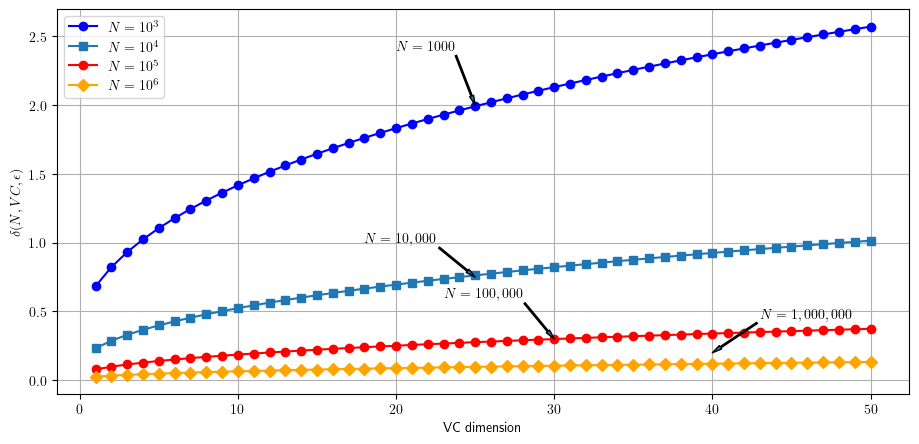

In [13]:
# figure 5 (how delta varies as a function of VC)

f1, axs1 =  plt.subplots(1, 1, figsize=(11,5))

axs1.plot(Vvec, delta[0, :], marker='o', c = 'blue')
axs1.plot(Vvec, delta[1, :], marker='s')
axs1.plot(Vvec, delta[2, :], marker='o', c = 'red')
axs1.plot(Vvec, delta[3, :], marker='D', c = 'orange')
axs1.set_xlabel(r'VC dimension')
axs1.set_ylabel('$\delta(N,VC,\epsilon)$')
axs1.legend([r'$N = 10^3$',r'$N = 10^4$',r'$N = 10^5$', r'$N = 10^6$']);
axs1.grid(True)
axs1.annotate(r'$N = 1000$',xy=(25,2),xytext=(20,2.4),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1.annotate(r'$N = 10,000$',xy=(25,0.75),xytext=(18,1),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1.annotate(r'$N = 100,000$',xy=(30,0.3),xytext=(23,0.6),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1.annotate(r'$N = 1,000,000$',xy=(40,0.2),xytext=(43,0.45),arrowprops={"width":1,"headwidth":3,'headlength':7});

plt.savefig('fig 64.5.pdf')

**Figure 64.5** The plot illustrates the behavior of the bound $\delta(N,\textnormal{VC},\epsilon)$ in (64.13) as a function of the VC dimension for various values of $N$ and $\epsilon=0.01$.

##  Generates figure 11 comparing losses

In [14]:
n = 0
delta = 0.1
a = -1
b = 2
f_1 = np.zeros((np.arange(a, b+delta, delta).shape[0],))
f_2 = np.zeros((np.arange(a, b+delta, delta).shape[0],))
f_3 = np.zeros((np.arange(a, b+delta, delta).shape[0],))
f_4 = np.zeros((np.arange(a, b+delta, delta).shape[0],))
f_5 = np.zeros((np.arange(a, b+delta, delta).shape[0],))

for x in np.arange(a, b+delta, delta):
    f_1[n] = (1-x)**2
    f_2[n] = np.log(1+np.exp(-x))
    f_3[n] = np.exp(-x)
    f_4[n] = np.max(np.array([0, 1-x]))
    f_5[n] = np.max(np.array([0, -x]))
    n = n + 1
    

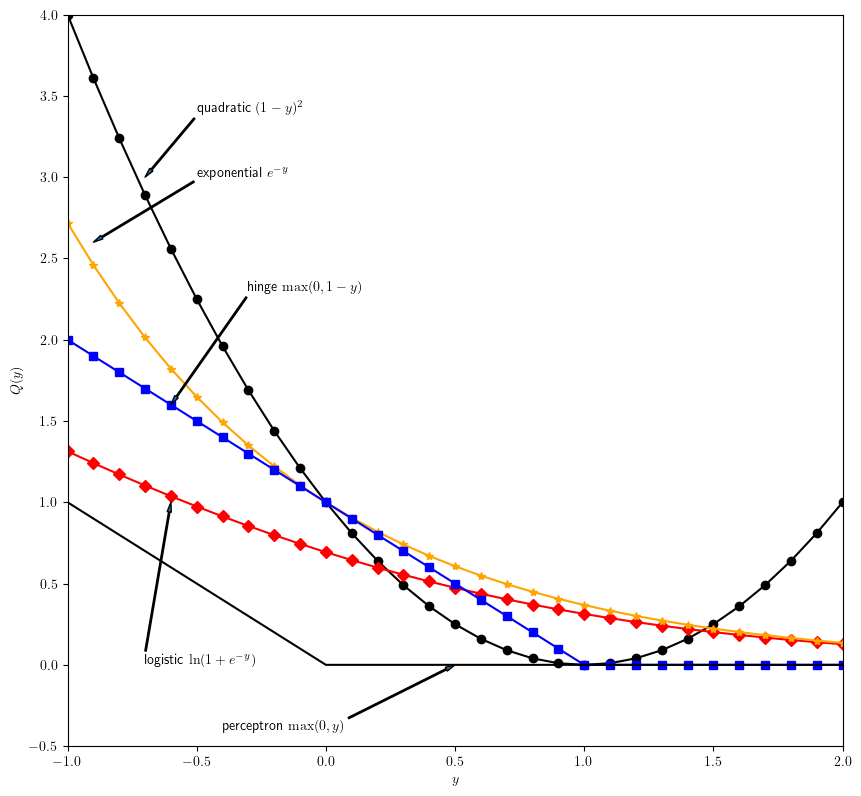

In [20]:
#figure 11 (different loss functions)

f1, axs1 =  plt.subplots(1, 1, figsize=(10,9.5))

axs1.plot(np.arange(a, b+delta, delta), f_1, marker='o', c = 'black')
axs1.plot(np.arange(a, b+delta, delta), f_2, marker='D', c = 'red')
axs1.plot(np.arange(a, b+delta, delta), f_3, marker='*', c = 'orange')
axs1.plot(np.arange(a, b+delta, delta), f_4, marker='s', c = 'blue')
axs1.plot(np.arange(a, b+delta, delta), f_5, c = 'black')

axs1.set_xlabel(r'$y$')
axs1.set_ylabel(r'$Q(y)$')
axs1.set_xlim([-1, 2])
axs1.set_ylim([-0.5, 4]);

axs1.annotate(r'quadratic $(1-y)^2$',xy=(-0.7,3),xytext=(-0.5,3.4),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1.annotate(r'exponential $e^{-y}$',xy=(-0.9,2.6),xytext=(-0.5,3),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1.annotate(r'hinge $\max(0, 1-y)$',xy=(-0.6,1.6),xytext=(-0.3,2.3),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1.annotate(r'logistic $\ln(1+e^{-y})$',xy=(-0.6,1.),xytext=(-0.7,0),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1.annotate(r'perceptron $\max(0, y)$',xy=(0.5,0),xytext=(-0.4,-0.4),arrowprops={"width":1,"headwidth":3,'headlength':7});

plt.savefig('fig 64.11.pdf')

**Figure 64.11** The dashed curve shows the plot of the ideal 0/1-loss $\mathbb{I}[y \leq 0]$. The other plots shows the loss functions $Q(y)$ for quadratic, exponential, logistic, hinge, and perceptron designs - see expressions (64.37a)-(64.27f) for the definitions. It is seen from the graphs that, with the exception of the perceptron loss, all other loss functions bound the 0/1-loss from above. Although not seen in the figure, this fact is also true for the logistic loss if we rescale it by 1/ ln 2 to ensure that its values becomes 1 at $y = 0$.